<a href="https://colab.research.google.com/github/japarra27/cda-projects/blob/master/Parcial_CDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parcial - CDA

**Presentado por:** Jaime Andrés Parra Mora - **202027161**

## Descripción del caso

La base de datos  a utilizar contiene información sobre las exportaciones realizadas en Colombia para el mes de Diciembre de un determinado año. Los datos incluyen el lugar de origen y destino de la exportación, el medio de transporte utilizado, el peso, la cantidad y el valor de la mercancía (incluidos valores de impuestos).  Al final de este enunciado se presenta la descripción detallada de la fuente. Esta fuente de es la base para resolver las preguntas del parcial que se presentan a continuación.

### Entendimiento del negocio y los datos

1. Describa el resultado del perfilamiento de datos e indique el tipo de cada variable.

In [ ]:
# Instalación de pandas-profiling
# ! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [1]:
# Ignorar warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# Importar librerias
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from pandas_profiling import ProfileReport
from scipy.stats import chi2_contingency

In [14]:
# Leer el dataset
df = pd.read_excel("Datos_parcial.xlsx")

# Primeros registros
df.head()

ID COD_SAL  VIA   CANTI  ...  FLETES  SEGURO  OTROSG          PAIS
0   9087     BOG    4   140.0  ...  517.00    0.00    0.00  PAISES BAJOS
1   3481     BOG    4   142.0  ...   45.24    1.09    0.00       ECUADOR
2   9368     BOG    4     1.0  ...    0.00     NaN    0.00        PANAMA
3  21953     IPI    3     2.0  ...  269.54     NaN   89.84       ECUADOR
4  14218     BUN    1  5328.0  ...    0.00     NaN    0.00        BRASIL

[5 rows x 12 columns]

In [4]:
# Validación tipos de datos
df.dtypes

ID           int64
COD_SAL     object
VIA          int64
CANTI      float64
PBK        float64
PNK        float64
FOBPES     float64
FOBDOL     float64
FLETES     float64
SEGURO     float64
OTROSG     float64
PAIS        object
dtype: object

In [15]:
# Ajuste valores columnas
valores_via = {1: "Marítimo",
               2: "Ferreo",
               3: "Terrestre",
               4: "Aereo",
               5: "Correo",
               6: "Multimodal",
               7: "Instalación de transporte fija",
               8: "Vias navegables interiores",
               9: "Otros modos de transporte"}

df.VIA = df.VIA.map(valores_via)
df.PAIS = df.PAIS.str.capitalize()

In [16]:
# Validación ultimas filas
df.tail()

ID COD_SAL        VIA   CANTI  ...  FLETES  SEGURO  OTROSG        PAIS
13921  17669     BUN   Marítimo  610.05  ...    0.00     NaN     0.0      Panama
13922  19754     BUN   Marítimo   89.00  ...    0.00     NaN     0.0     Bolivia
13923   2260     BOG      Aereo    2.00  ...    0.00     NaN     0.0  Costa rica
13924  22474     IPI  Terrestre   10.00  ...    0.00     NaN     0.0     Ecuador
13925  18587     BUN   Marítimo   33.75  ...    0.25     NaN     0.0        Peru

[5 rows x 12 columns]

In [17]:
# Validación y eliminación de duplicados
if df.duplicated().sum() >0:
  print("si existen filas duplicadas")
  df.drop_duplicates(inplace=True)
else:
  print("no existen filas duplicadas")

si existen filas duplicadas


In [12]:
# Perfilamiento de datos
profile = ProfileReport(df, title='Reporte de exportaciones', explorative=True)

In [13]:
profile.to_notebook_iframe()

In [18]:
# Nueva validación tipos de datos
df.dtypes

ID           int64
COD_SAL     object
VIA         object
CANTI      float64
PBK        float64
PNK        float64
FOBPES     float64
FOBDOL     float64
FLETES     float64
SEGURO     float64
OTROSG     float64
PAIS        object
dtype: object

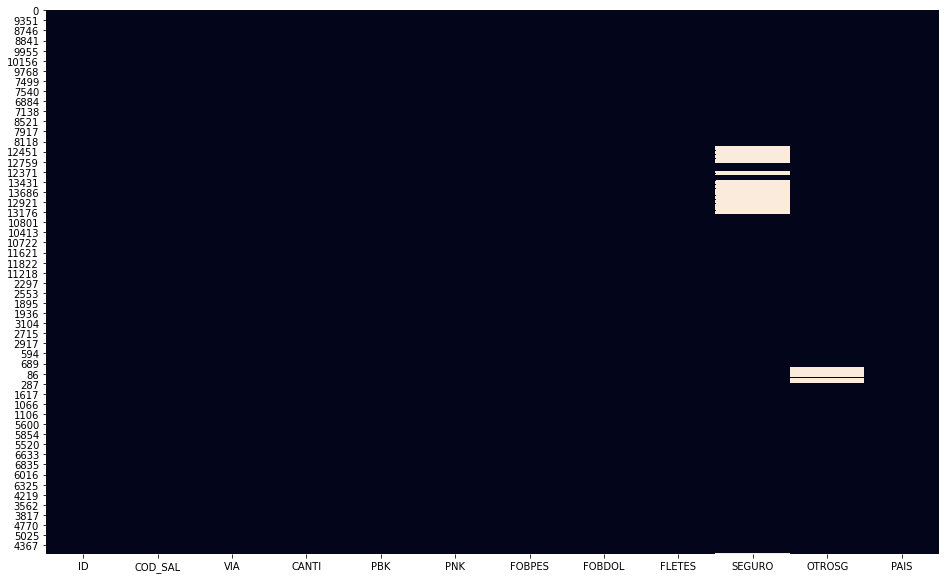

In [21]:
# Overview valores faltantes
plt.figure(figsize=(16, 10))
sns.heatmap(df.isnull().sort_values("PAIS", ascending=True), cbar=False);

**Conclusiones:**  Con base en la información analizada anteriormente:

1. Se observa que la mayor cantidad de variables son numéricas, la única variable que inicialmente se consideró numérica pero cambió a categórica fue `VIA` debido a que en el dataset se representaba numérica aunque hacía relación a las vías de transporte utilizadas.

2. Existían valores duplicados, esto puede generar problemas a la hora de ampliar el entendimiento de los datos, por tal motivo se eliminaron antes de hacer el respectivo proceso de perfilamiento.

3. Los tipos de variables son:

- `ID`           int64   `numérica discreta`
- `COD_SAL`     object   `categórica`
- `VIA`         object   `categórica`
- `CANTI`      float64   `numérica continua`
- `PBK`        float64   `numérica continua`
- `PNK`        float64   `numérica continua`
- `FOBPES`     float64   `numérica continua`
- `FOBDOL`     float64   `numérica continua`
- `FLETES`     float64   `numérica continua`
- `SEGURO`     float64   `numérica continua`
- `OTROSG`     float64   `numérica continua`
- `PAIS`        object   `categórica`

Todas estas variables cumplen con el tipo de dato necesario para realizar posteriores análisis. También es necesario aclarar que aunque el id es una variables numérica, esta no tiene análisis debido a que corresponde a un número que hace referencia al id de la exportación.

4. Existen valores perdidos, sin embargo es necesario validar si tienen alguna justificación o únicamente no fueron digitados.

2. Describa el entendimiento que tiene del negocio a partir de los datos suministrados. 

**Conclusiones:** Con base en la información anterior y teniendo en cuenta la información disponible de la fuente de datos:

1. Esta información hace referencia a las exportaciones que se generan en Colombia, que son registradas de forma legal y se basan en las declaraciones de exportaciones presentadas ante las diferentes administraciones de aduanas del país.

2. Los valores FOB hacen referencia al valor de la mercancía "libre a bordo".Estas se valoran a precios FOB debido a que incluyen todos los costos de transporte de los bienes a la frontera aduanera, los derechos de exportación y el costo de carga de los bienes en el medio de transporte utilizado. Su importancia radica en medir la evolución de los bienes exportables y se constituye en un insumo para calcular la balanza comercial del país con el resto del mundo.

3. Los valores FOB se miden tanto en pesos como en USD, esto es importante debido a que la tasa de cambio puede beneficiar/afectar a los exportadores, por tal motivo para tener una moneda estandar comparable entre paises se recomienda en ciertos casos utilizar los valores en USD.

4. Aunque esta información es reportada por el DANE, la DIAN es la poseedora de la información detallada de todas las exportaciones que se generen. El DANE solo arroja cifras agregadas para análisis e informes.

### Análisis y propuestas accionables

3. Plantee 4 hipótesis de interés para el negocio que al resolverlas generen un beneficio. Justifique su respuesta en términos de los datos, los análisis realizados para definirlas y la organización beneficiaria de la solución.

**Planteamiento de hipótesis:**

  1. La ubicación geográfica facilita un mayor volumen de exportaciones. Esto puede estar relacionado a que los costos de transporte son menores.
  2. Las vías de transporte juegan un eje fundamental en las exportaciones, si el medio es el adecuado los costos y seguros serán menores.
  3. Las vias para mover la mercancía tienen influencia en el lugar dónde se puede exportar, esto se debe a que paises más cercanos a las zonas costeras tendrán más incentivos, mientras que paises más lejanos preferirán vuelos o incluso, les será indiferente el medio de transporte.
  4. Existe una relación entre el lugar dónde sale la exportación y el medio de transporte utilizado, esto puede ser valido, si los lugares dónde son más cercanos al mar también son lugares que cuentan con las vias de transporte adecuadas.
  



4. Describa e ilustre los problemas de calidad de los datos que pueden afectar los análisis propuestos en las hipótesis.

Con base en la información encontrada en el punto No. 1:

- Se evidenciaron valores duplicados, por tal motivo se hizo la respectiva eliminación.

- Existen valores numéricos faltantes, la mejor alternativa es agrupar por vía y país con el fin de sacar un promedio para completar, sin embargo en esta primera iteración se hará completado de valores con el promedio de todas las exportaciones.

- Existen muchas columnas en 0, esto se puede deber a un tema de falta de datos, sin embargo debido a que la mayor cantidad de valores corresponden a 0 se pueden generar problemas de validación de información.

In [26]:
df.describe()

ID         CANTI  ...        SEGURO        OTROSG
count  13735.000000  13735.000000  ...  12312.000000  13336.000000
mean   19848.693193    555.531199  ...      2.103527      8.421064
std    12057.432638    985.256750  ...     18.144096    134.923310
min      535.000000      0.010000  ...      0.000000      0.000000
25%     8924.500000     20.000000  ...      0.000000      0.000000
50%    20005.000000    122.000000  ...      0.000000      0.000000
75%    31386.500000    577.050000  ...      0.000000      0.000000
max    39425.000000   5454.000000  ...   1139.450000  11752.540000

[8 rows x 9 columns]

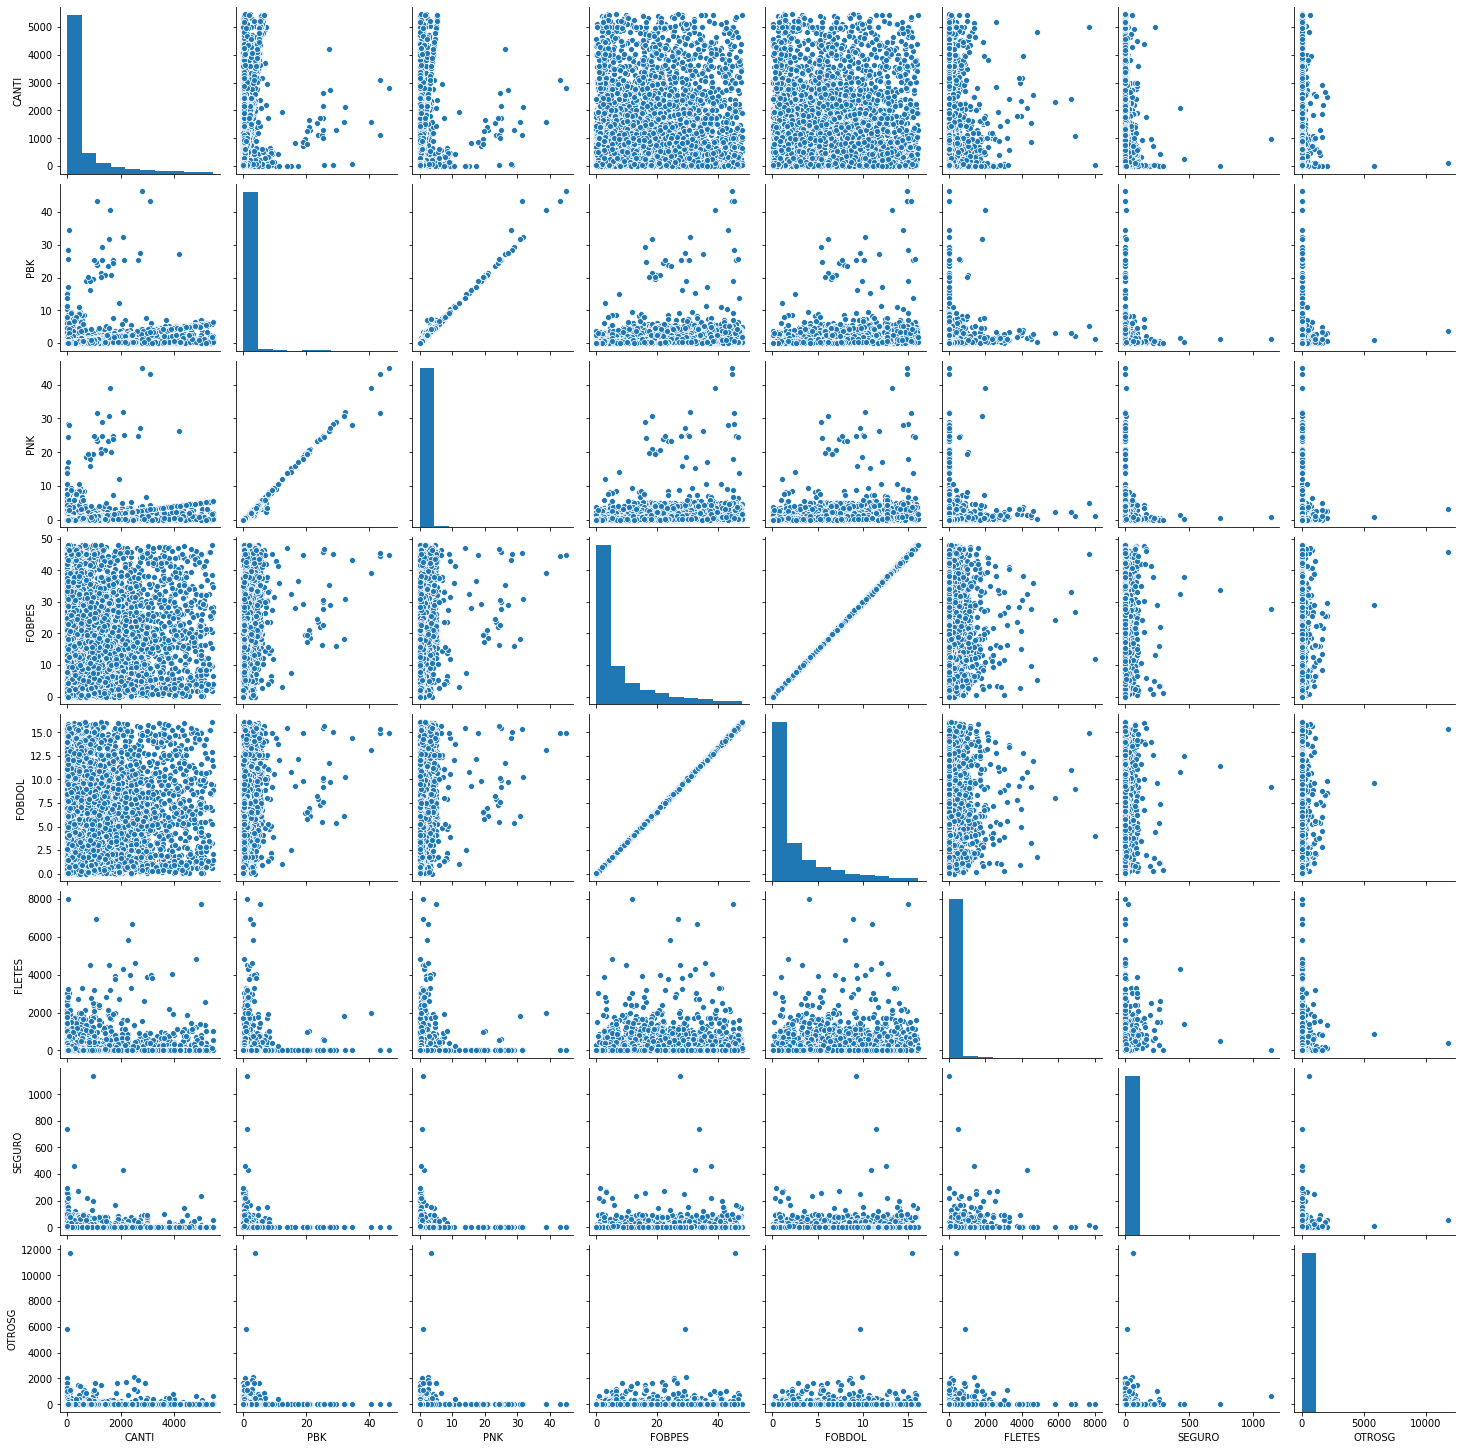

In [32]:
sns.pairplot(df.iloc[:, 1:]);

5. Realice los ajustes que considere necesarios sobre los datos para realizar los análisis propuestos y justifique sus decisiones.

In [34]:
# Completar valores faltantes
df.FLETES = df.FLETES.fillna(value=np.mean)
df.SEGURO = df.SEGURO.fillna(value=np.mean)
df.OTROSG = df.OTROSG.fillna(value=np.mean)

6. Valide 2 de las hipótesis planteadas en el punto anterior. Una de las hipótesis debe ser entre variables numéricas y la otra entre variables categóricas. Indique los sesgos que pueden existir con el análisis realizado para validar las hipótesis seleccionadas. 

#### **Validación de hipótesis**


1. La ubicación geográfica facilita un mayor volumen de exportaciones. Esto puede estar relacionado a que los costos de transporte son menores.

In [70]:
df_geo_fob = df[["COD_SAL", "FLETES"]].groupby("COD_SAL").sum().sort_values("FLETES", ascending=False).reset_index()
df_geo_count = df[["COD_SAL", "ID"]].groupby("COD_SAL").count().sort_values("ID", ascending=False).reset_index()

In [71]:
df_fob = pd.merge(df_geo_fob, df_geo_count, on="COD_SAL")

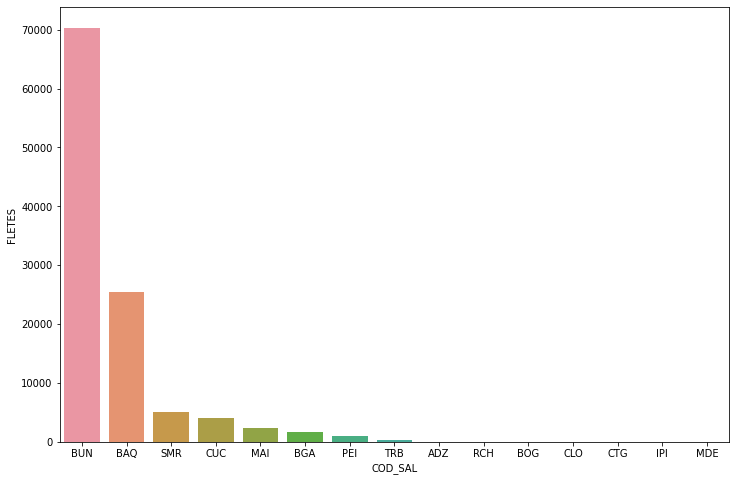

In [73]:
plt.figure(figsize=(12, 8))
sns.barplot(df_fob.COD_SAL, df_fob.FLETES);

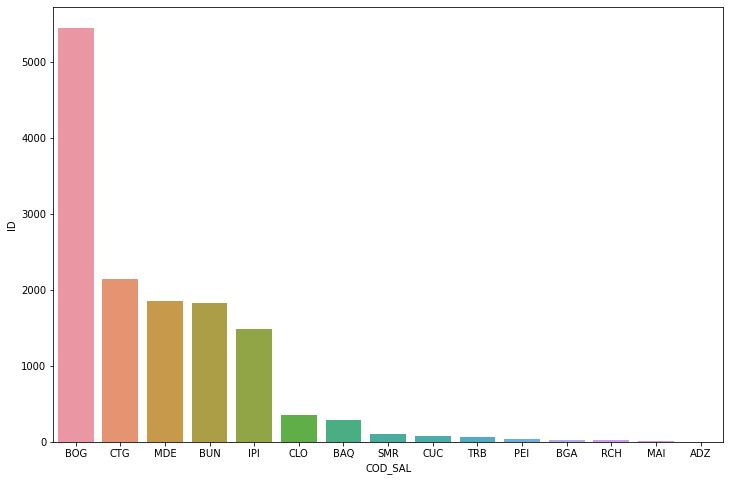

In [74]:
df_fob = df_fob.sort_values("ID", ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(df_fob.COD_SAL, df_fob.ID);

In [76]:
df_fob

COD_SAL    FLETES    ID
10     BOG       NaN  5447
12     CTG       NaN  2142
14     MDE       NaN  1847
0      BUN  70334.71  1829
13     IPI       NaN  1489
11     CLO       NaN   351
1      BAQ  25446.82   282
2      SMR   5131.86   104
3      CUC   4134.14    84
7      TRB    359.12    64
6      PEI   1004.45    32
5      BGA   1643.53    29
9      RCH      0.00    23
4      MAI   2353.19    11
8      ADZ      0.00     1

In [78]:
# Validación de relación
df_fob.corr()

FLETES        ID
FLETES  1.000000  0.977221
ID      0.977221  1.000000

- Con base en la información obtenida:

  1. Las ciudades costeras son las que tienen el mayor valor en fletes, esto va en sentido contrario con el supuesto de que las ciudad que están más cerca al oceano deberían tener menos costos dado la distancia. Estas ciudades son Bucaramanga y Barranquilla, dónde se concentran los puertos más grandes del país.

  2. Si se valida el volumen de exportaciones, estas corresponden principalmente a la capital del país, esto se puede explicar debido a que Bogotá es la que concentra el mayor porcentaje de comercio comparado con otras ciudades, por lo cual el volumen que sale tendría sentido. Sin embargo se genera un problema de información con los fletes, debido a que si se valida estas cifras no tiene información.

**Conclusiones**: Con base en el análisis realizado y la información obtenida, se evidencia problemas en los datos con los valores en 0, dado que son la mayor cantidad de columnas; esto puede generar problemas en el análisis y los resultados de la hipótesis no pueden ser concluyentes. En este caso se sugiere obtener una muestra de datos más amplia que permita validar el comportamiento de estos datos.

2. Las vias para mover la mercancía tienen influencia en el lugar dónde se puede exportar, esto se debe a que paises más cercanos a las zonas costeras tendrán más incentivos, mientras que paises más lejanos preferirán vuelos o incluso, les será indiferente el medio de transporte.

In [99]:
df_pais = df.groupby("PAIS")["ID"].agg("count").reset_index().sort_values("ID", ascending=False)

In [104]:
df_vias = pd.crosstab(df.PAIS, [df.VIA, df.COD_SAL])

In [105]:
df_vias

VIA            Aereo                        ... Marítimo         Terrestre          
COD_SAL          BAQ BGA  BOG CLO CTG  MDE  ...      RCH SMR TRB       CUC   IPI MAI
PAIS                                        ...                                     
Bolivia            0   1  191   5   0  102  ...        0   0   0         0     0   0
Brasil             0   0   77   0   1    1  ...        0   0   0         0     0   0
Canada             0   0  164   2   0  128  ...        0   0   0         0     0   0
Chile              4   0  239  21   0    7  ...        0   0   0         0     0   0
Costa rica         4   0  560  22   0  176  ...        0   0  29         0     0   0
Curazao            1   6   75  20   0   24  ...        0   0  23         0     0   0
Ecuador            0   0  451   2   1   26  ...        0   0   0         0  1475   0
El salvador        1   0  149   5   0   24  ...        0   0   0         0     0   0
Espana             0   0  139   6   0   80  ...        0   0   1         0     0   0
Guatemala          0   2  327  37   0  146  ...        0   0   0         0     0   0
Honduras           0   1   94   4   0   23  ...        0   0   0         0     0   0
Mexico             0   0  440  51   0  125  ...        0   0   0         0     0   0
Paises bajos       0   0  106   1   0    6  ...        0  12   0         0     0   0
Panama            17  14  537  32   2  146  ...        0   0   0         0     0   0
Peru               0   0  546  25   1   60  ...        0   0   0         0    14   0
Puerto rico        0   3  162  14   0   11  ...        0   0   0         0     0   0
Reino unido        0   0   82   0   0    7  ...        0   8   2         0     0   0
Rep dominicana     3   0  146   5   0   77  ...        0   2   7         0     0   0
Usa               22   2  921  99   0  670  ...       23  82   2         0     0   0
Venezuela          0   0   39   0   0    7  ...        0   0   0        84     0  11

[20 rows x 19 columns]

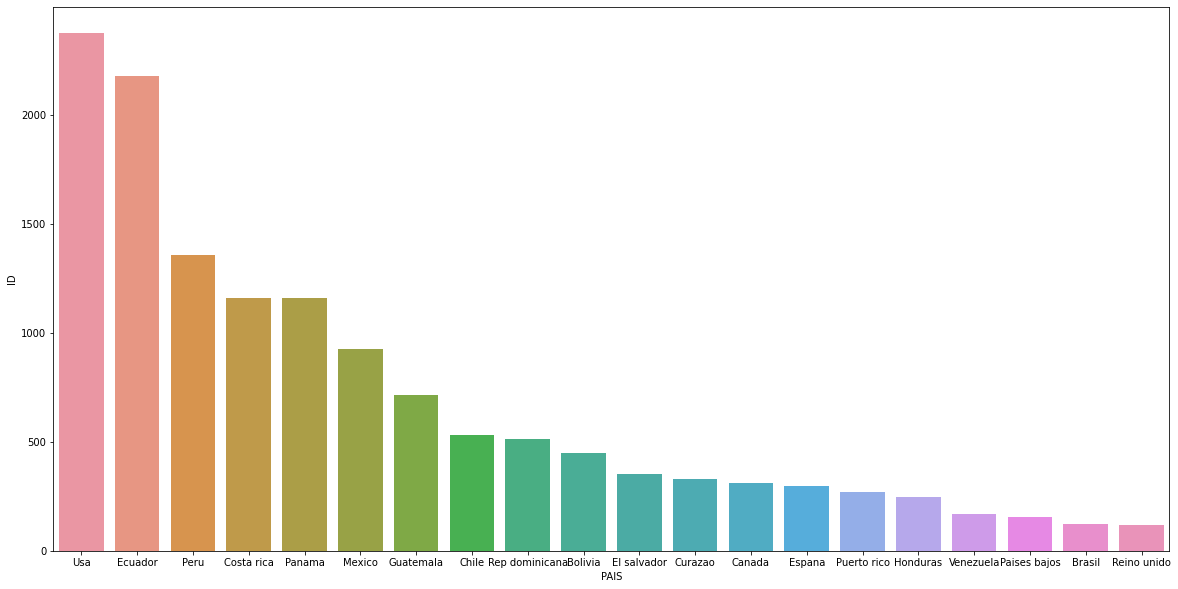

In [106]:
plt.figure(figsize=(20, 10))
sns.barplot(df_pais.PAIS, df_pais.ID);

In [107]:
chi2, p, dof, expected = chi2_contingency(df_vias.values)
print("Chi-squared Statistic %0.3f p_value %0.3f" % (chi2, p))

Chi-squared Statistic 25093.018 p_value 0.000


**Conclusiones**:

1. Con base en los resultados obtenidos anteriormente, se observa que el medio de transporte y la ciudad de origen si tienen impacto a la hora en la cual se exporta. En el caso de Estados Unidos, debido a la distancia, es de mayor preferencia utilizar el transporte aereo, eso explicaría que Bogotá sea la ciudad dónde más sale mercancía, teniendo también presente que es la capital y que el desarrollo de la estructura aeroportuaria es de los más desarrollados.

Sin embargo es necesario validar más información con el fin de determinar si estas conclusiones son concluyentes.

### Impacto en la ley de protección de datos

7. Se desea generar una estrategia que permita aumentar las exportaciones de Colombia en distintos sectores de la economía Colombiana priorizando los lugares que presentan un menor número de exportaciones. Sin embargo, antes de poner en marcha cualquier estrategia, se quiere resolver la siguiente duda: ¿Qué tipo de dificultades podrían tener las iniciativas planteadas por el gobierno, en el marco de la ley de protección de datos personales colombiano? 

**Conclusiones:** Con base en la información analizada y teniendo en cuenta la política de datos y recolección de información, no se evidencia ningún problema en generar iniciativas que permitan conocer el comportamiento de las exportaciones en Colombia, esto se debe a que las transacciones no llevan información alguna que permita reconocer a las personas que importan o exportan productos, al igual que empresas y demás.

También es importante mencionar que no existe problemas en utilizar esta información con fines de análisis, sin embargo existe una cláusula en la cual esta información no podrá ser utilizada con fines comerciales, de tributación o de investigación.

Teniendo en cuenta lo anterior, el gobierno, como responsable de la gestión de exportaciones en el país no tendría problemas para generar iniciativas para incentivar las exportaciones.